In [186]:
import sqlite3
import pandas as pd

CONNECT TO THE DATABASE

In [187]:
conn = sqlite3.connect('basketball.db')
# This opens the file "basketball.db". If it exists, we connect.
# If not, SQLite will create an empty one. We store the connection in "conn".

LIST ALL TABLES INSIDE THE DATABASE

In [188]:

query_tables = "SELECT name FROM sqlite_master WHERE type = 'table';"
# This SQL command asks SQLite: "Give me the names of all tables in this database".

tables = pd.read_sql(query_tables, conn)
# Pandas executes the SQL command and stores the result inside a DataFrame.

print('Tables in the database:')
print(tables)

Tables in the database:
                            name
0                        players
1          player_regular_season
2   player_regular_season_career
3                player_playoffs
4         player_playoffs_career
5                 player_allstar
6                          teams
7                    team_season
8                          draft
9                 coaches_season
10                coaches_career
11               data_dictionary


LOAD A SPECIFIC TABLE INTO PYTHON

In [189]:
query_data = "SELECT * FROM player_regular_season_career;"
# This SQL command means: "Select every row and every column from this table".

data = pd.read_sql(query_data, conn)
# Load the result into a pandas DataFrame called "data".


conn.close()
# We are done with the database, so we close the connection to avoid errors.

BASIC DATA UNDERSTANDING


In [190]:
data.head()
# Shows the first 5 rows so we can see what the table looks like.

print(data.shape)
# Tells us how many rows and columns we have.

print(data.info())
# Shows the data types and how many missing values exist.

print(data.describe())
# Shows basic statistical information for numbers (mean, min, max, std, etc.)

(3784, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3784 entries, 0 to 3783
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ilkid      3784 non-null   object 
 1   firstname  3784 non-null   object 
 2   lastname   3784 non-null   object 
 3   leag       3784 non-null   object 
 4   gp         3406 non-null   float64
 5   minutes    3406 non-null   float64
 6   pts        3406 non-null   float64
 7   oreb       3406 non-null   float64
 8   dreb       3406 non-null   float64
 9   reb        3406 non-null   float64
 10  asts       3406 non-null   float64
 11  stl        3406 non-null   float64
 12  blk        3406 non-null   float64
 13  turnover   3406 non-null   float64
 14  pf         3406 non-null   float64
 15  fga        3406 non-null   float64
 16  fgm        3406 non-null   float64
 17  fta        3406 non-null   float64
 18  ftm        3406 non-null   float64
 19  tpa        3406 non-null   float64
 2

IMPORT VISULIZATION LIBRARIES

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [192]:
# Set plotting style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

CHECK MISSING VALUES

In [193]:
print('Missing values in each column:')
data.isnull().sum().sort_values(ascending=False)
# Checks how many values are missing in each column.

Missing values in each column:


,0
gp,378
dreb,378
oreb,378
pts,378
minutes,378
turnover,378
pf,378
fga,378
fgm,378
reb,378


SHOW UNIQUE VALUES PER COLUMN


In [194]:
for col in data.columns:
    print(f'{col}: {data[col].nunique()} unique values')
# This loops through all column names.
# For each column, it prints how many different values exist.

ilkid: 3596 unique values
firstname: 1002 unique values
lastname: 2233 unique values
leag: 3 unique values
gp: 856 unique values
minutes: 2352 unique values
pts: 2034 unique values
oreb: 804 unique values
dreb: 1159 unique values
reb: 1590 unique values
asts: 1227 unique values
stl: 690 unique values
blk: 508 unique values
turnover: 941 unique values
pf: 1386 unique values
fga: 2001 unique values
fgm: 1559 unique values
fta: 1383 unique values
ftm: 1247 unique values
tpa: 581 unique values
tpm: 370 unique values


SUMMARY STATISTICS FOR NUMERICAL FEATURES

In [195]:
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features].describe()

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
count,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000
mean,247.436583,5712.286553,2607.417499,221.960951,543.913095,1113.527305,575.503230,151.398415,91.617146,285.404580,598.255138,2212.852613,1002.290370,712.956254,539.815326,153.728127,49.602173
std,287.382676,8528.386327,4257.551320,492.661562,1117.328553,1961.444742,1094.391436,296.769238,253.646864,529.065628,781.088169,3474.014198,1629.838489,1220.075690,938.242097,476.013843,167.898898
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,144.000000,106.250000,0.000000,0.000000,30.000000,18.000000,0.000000,0.000000,0.000000,43.000000,108.000000,39.000000,30.250000,21.000000,0.000000,0.000000
50%,118.000000,1405.500000,645.500000,9.000000,40.000000,253.000000,121.000000,13.000000,5.000000,31.500000,215.000000,625.500000,248.500000,188.000000,131.000000,2.000000,0.000000
75%,386.000000,8104.750000,3283.000000,196.750000,570.750000,1365.250000,623.750000,154.000000,62.000000,318.750000,910.750000,2835.750000,1253.250000,860.000000,641.750000,42.000000,9.000000
max,1611.000000,57446.000000,38387.000000,6731.000000,11511.000000,23924.000000,15806.000000,2514.000000,3830.000000,4524.000000,4657.000000,28307.000000,15837.000000,13188.000000,9787.000000,4345.000000,2560.000000


HEATMAP

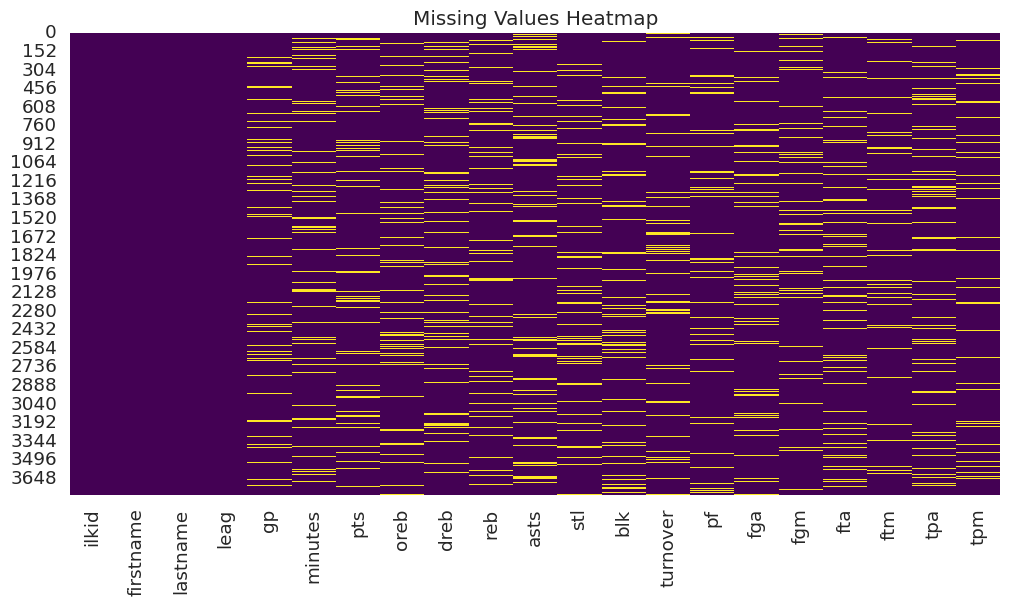

In [196]:
plt.figure(figsize=(12, 6))
# Makes the plot wide so it's easier to see.

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
# Creates a heatmap.
# Yellow = missing values, Purple = present values.

plt.title('Missing Values Heatmap')
plt.show()

DISTRIBUTIONS OF NUMERICAL METRICS

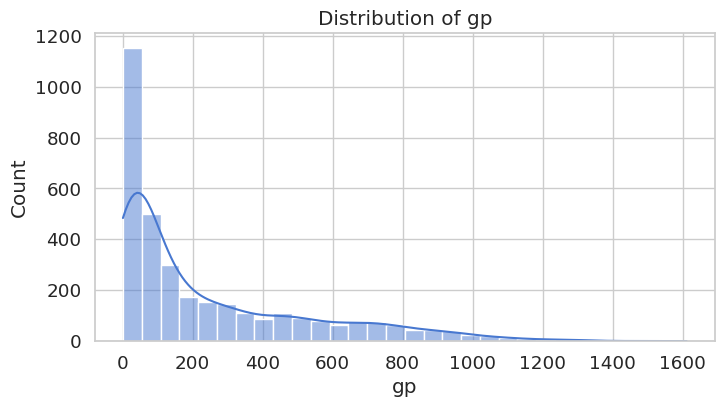

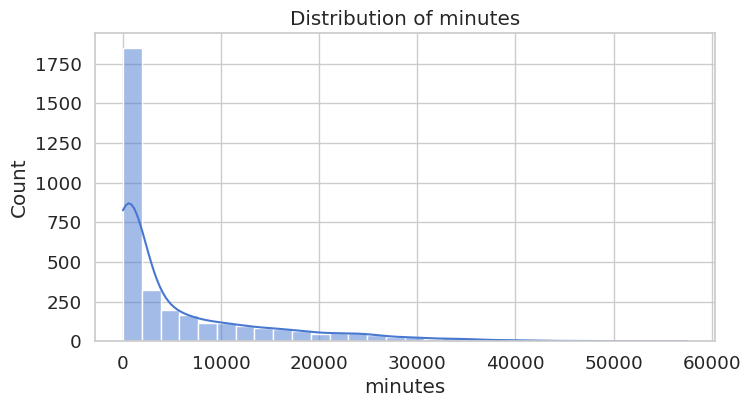

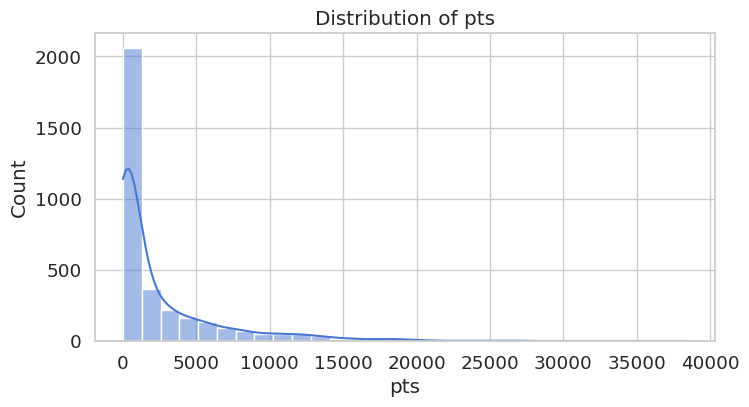

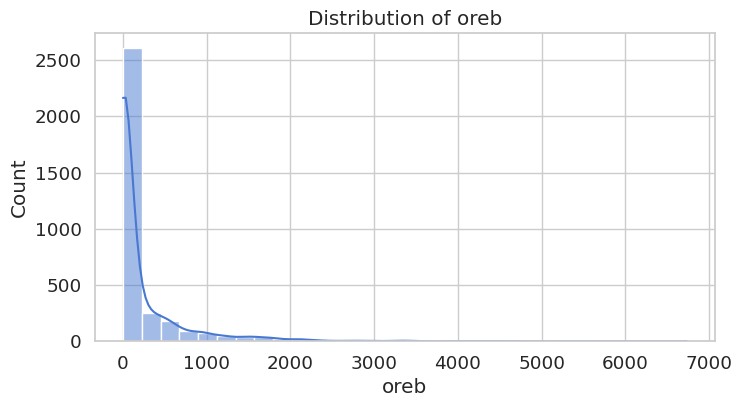

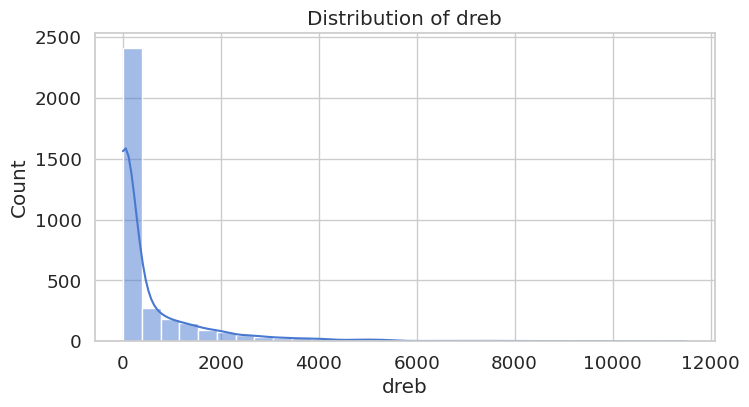

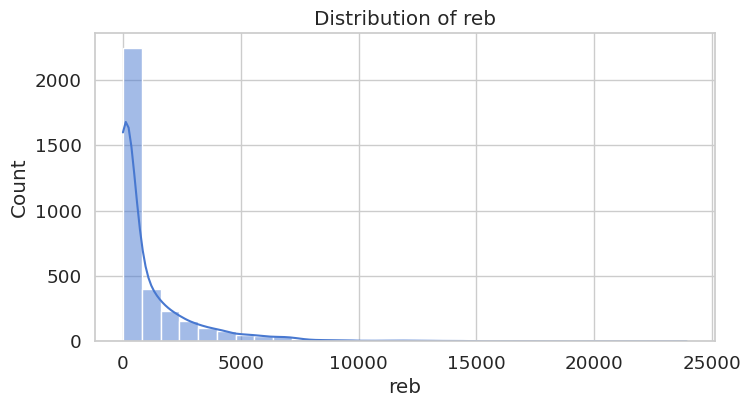

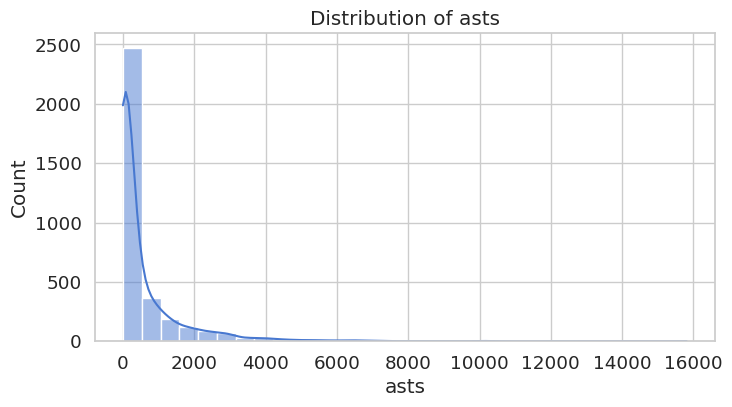

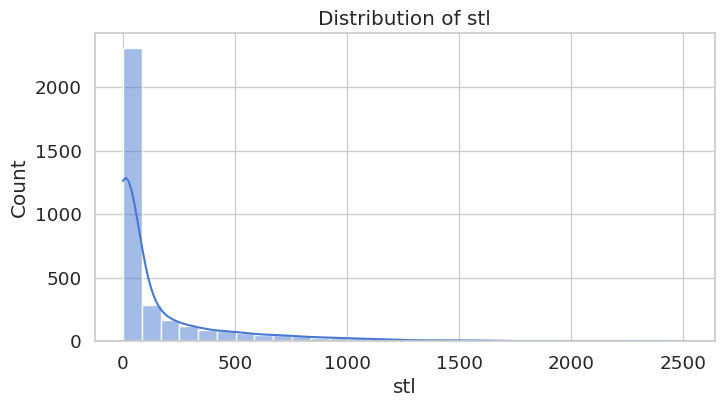

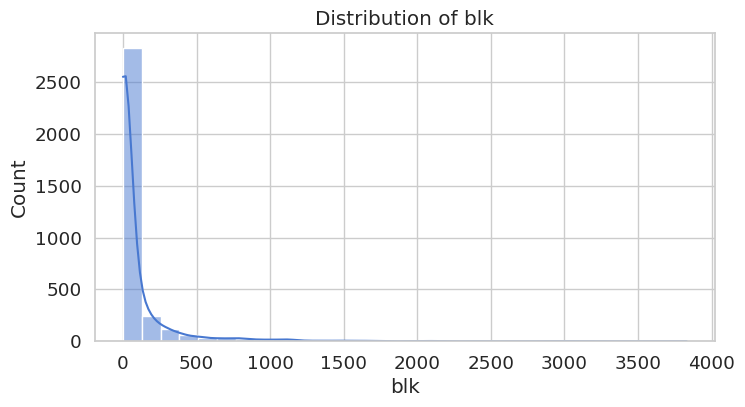

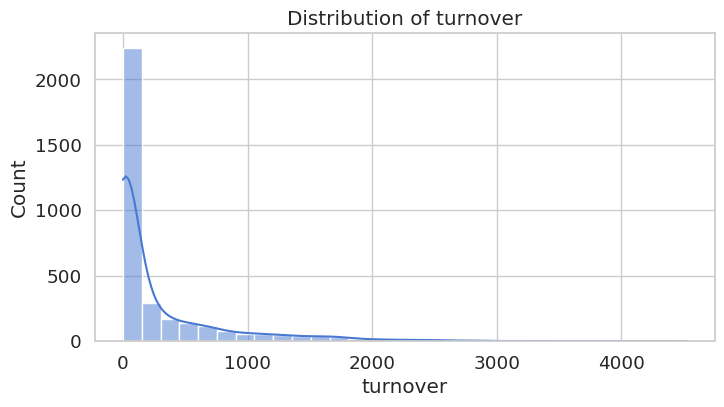

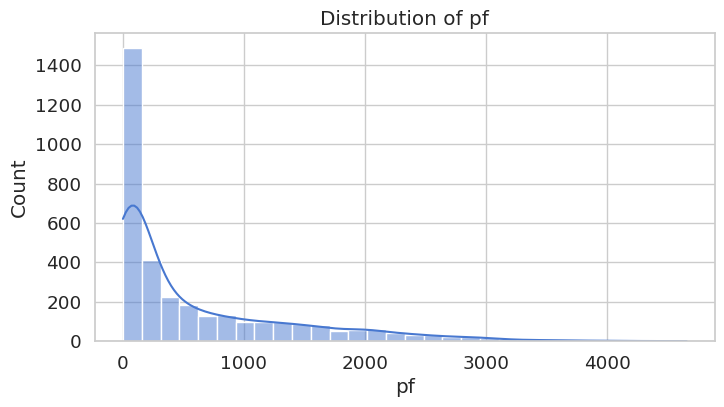

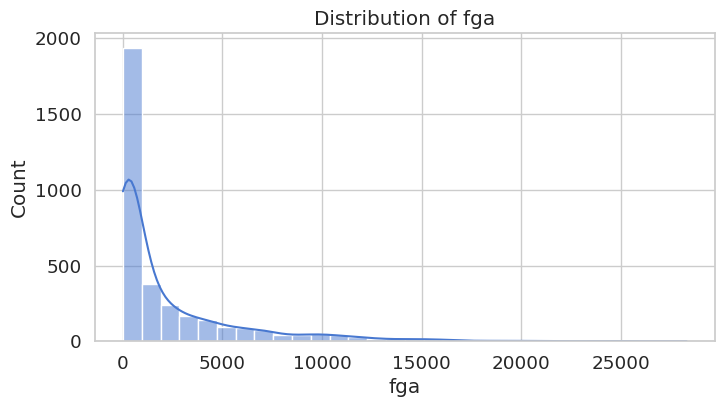

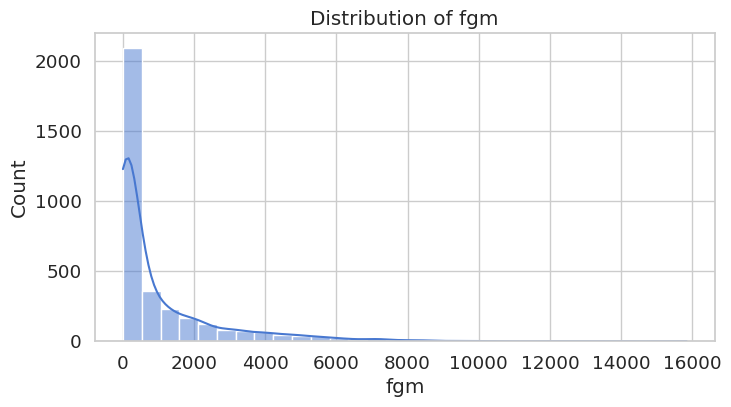

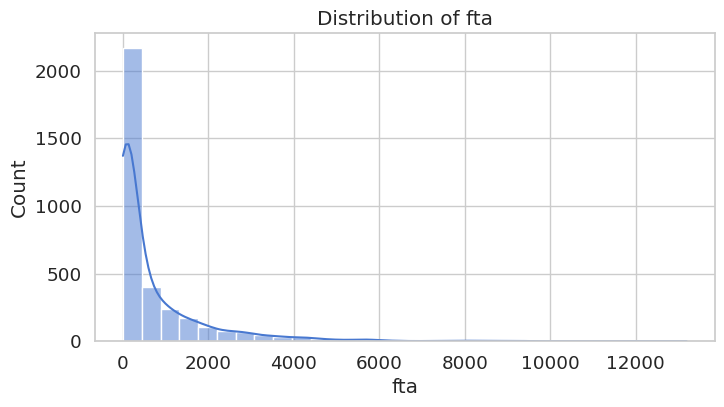

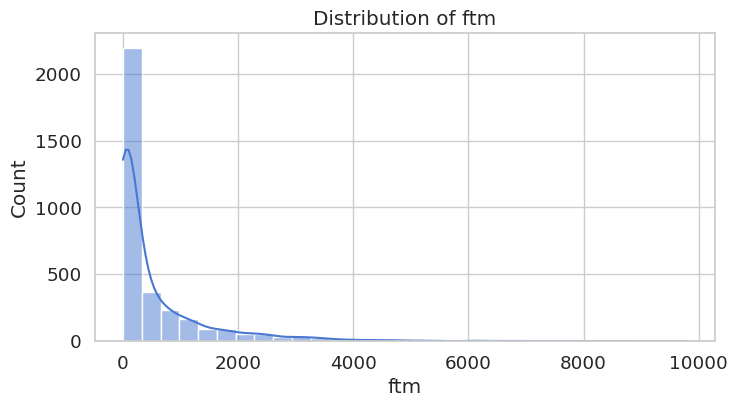

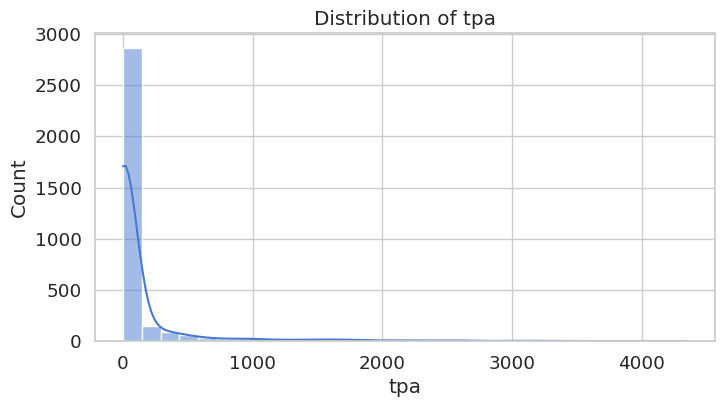

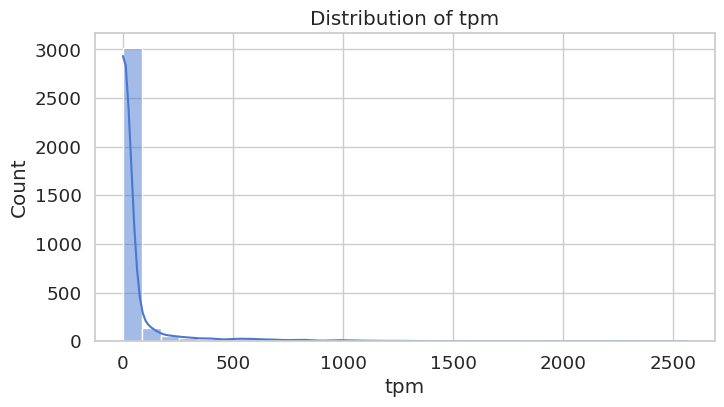

In [197]:
# Distribution of numerical metrics
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

BOXPLOTS FOR OUTLIERS

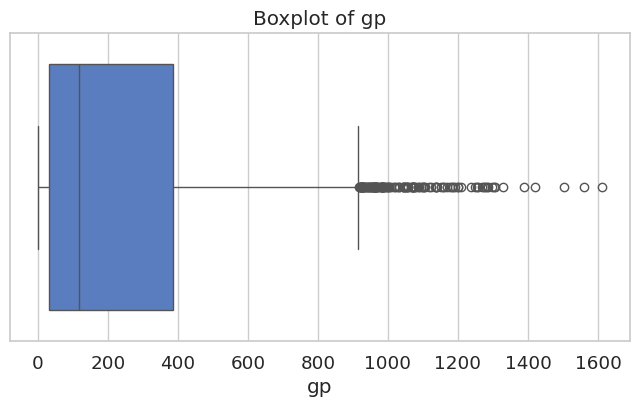

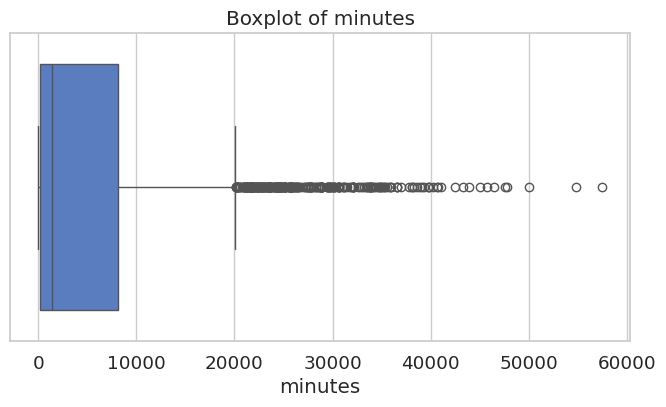

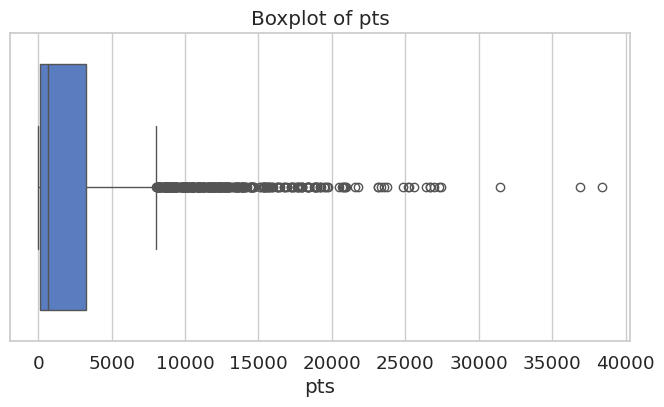

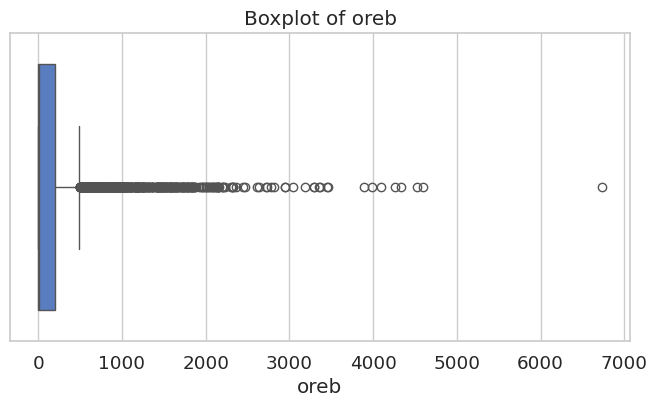

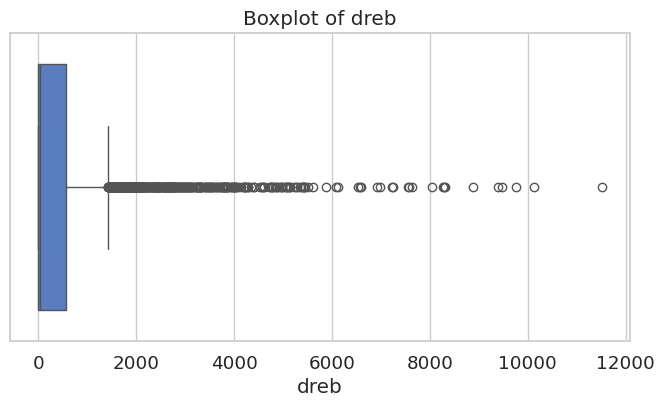

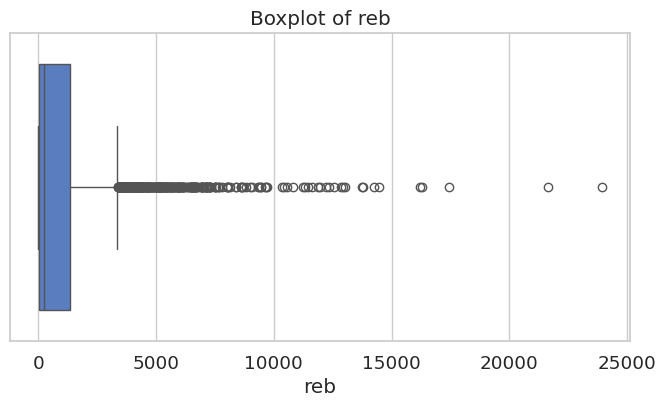

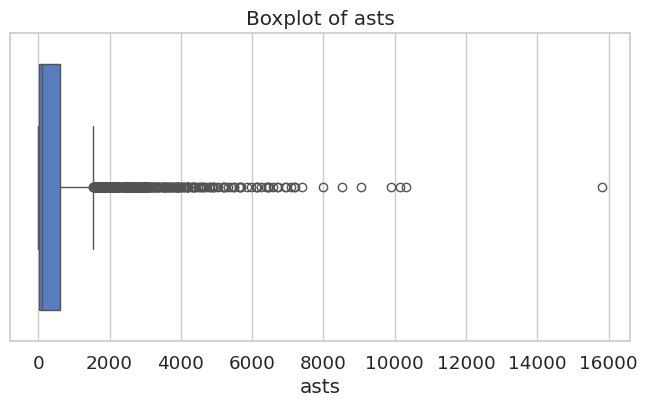

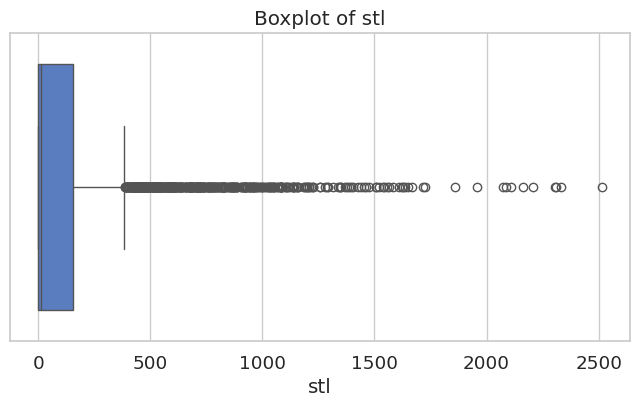

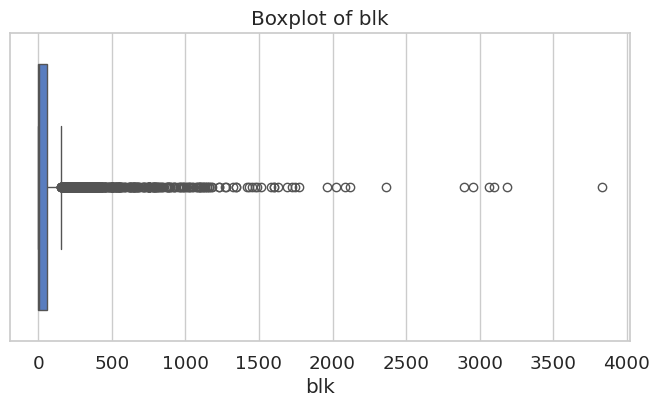

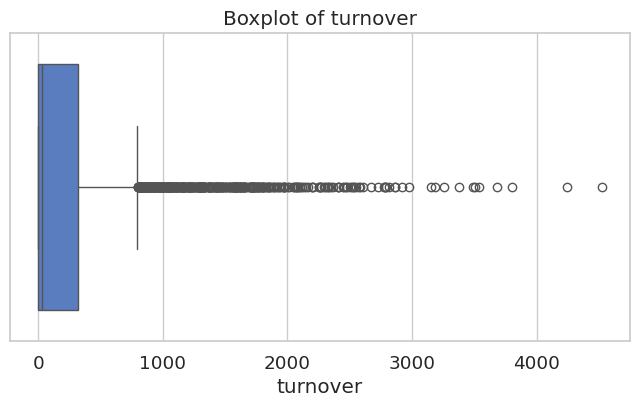

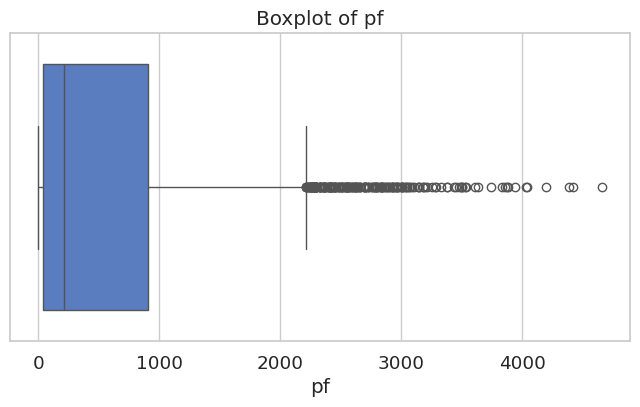

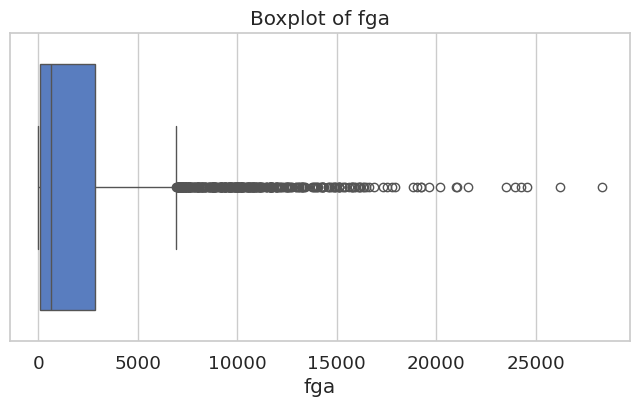

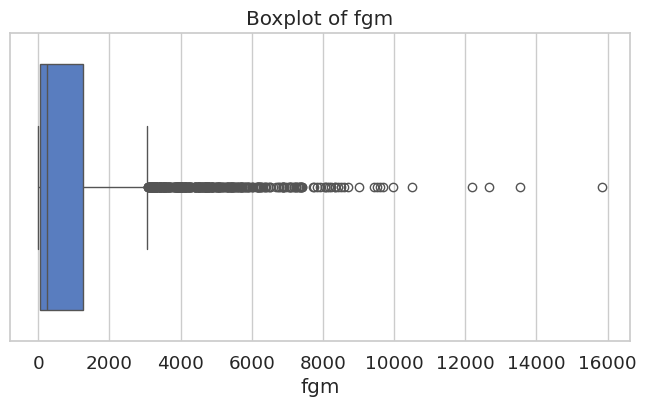

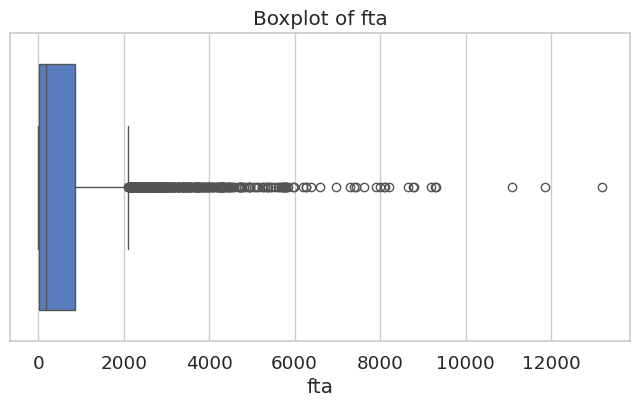

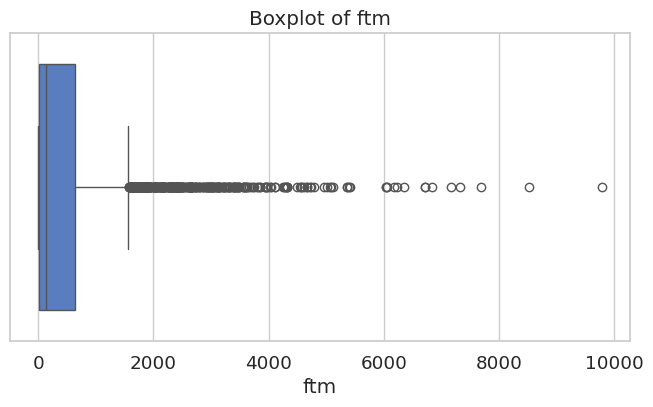

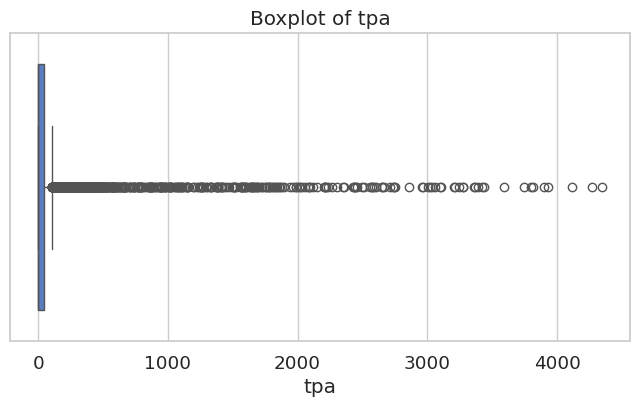

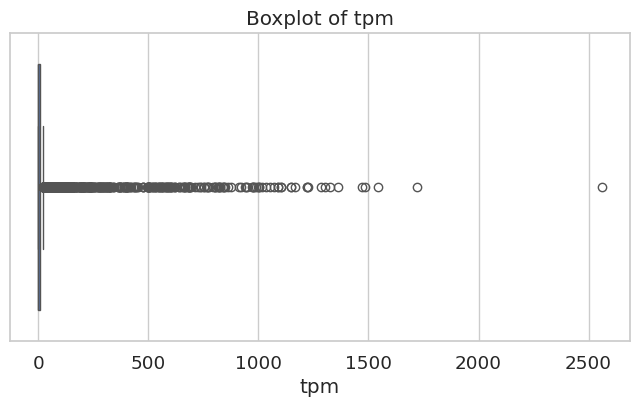

In [198]:
# Boxplots for outliers
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

CORRELATION MATRIX

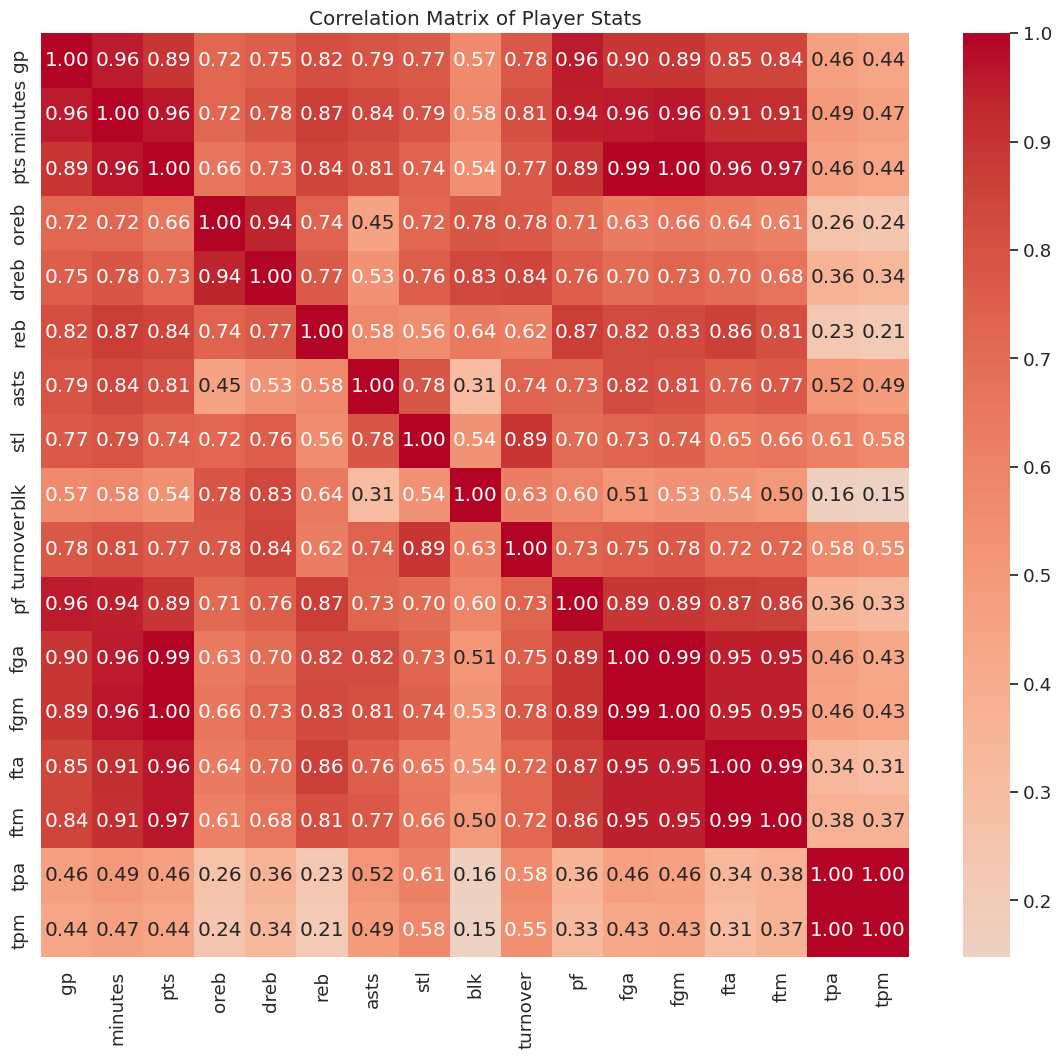

In [199]:
plt.figure(figsize=(14, 12))
corr = data[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Player Stats')
plt.show()

SCATTER PLOTS FOR KEY RELATIONSHIPS

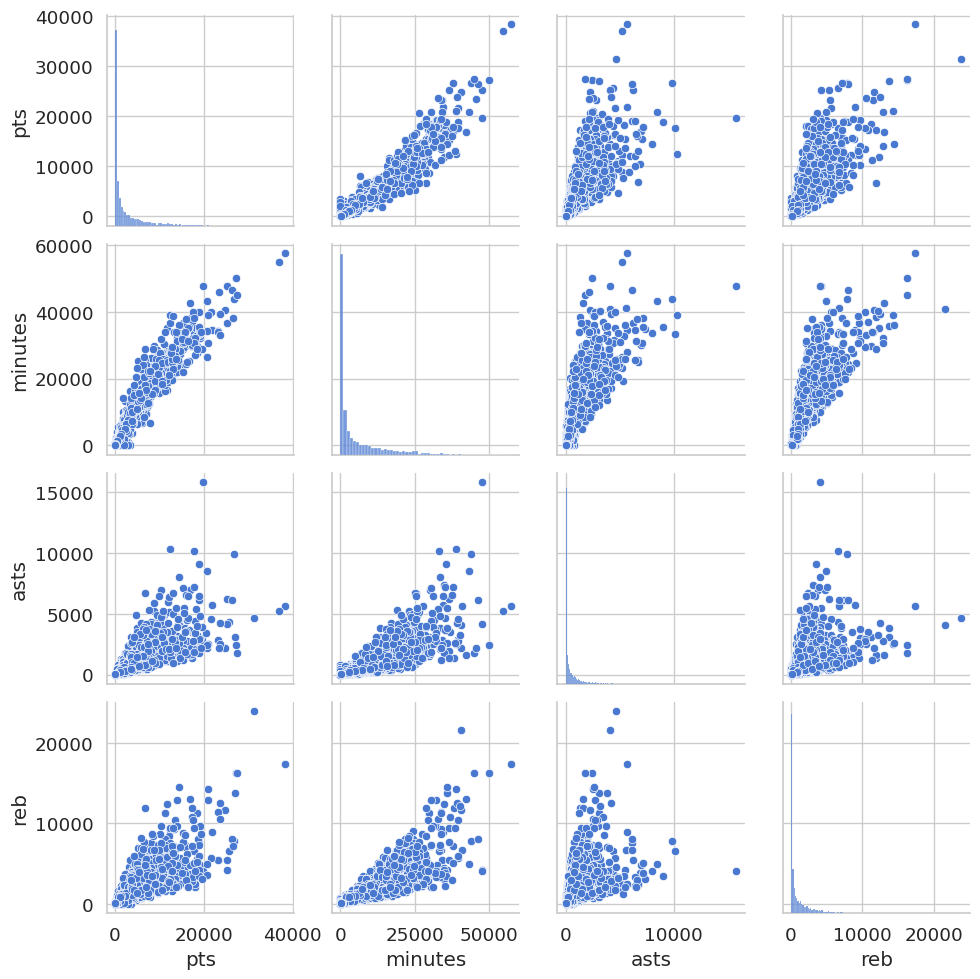

In [200]:
# Scatter plots for key relationships
sns.pairplot(data[['pts', 'minutes', 'asts', 'reb']])
plt.show()

In [201]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

HANDLE MISSING VALUES

In [202]:
numerical_features = data.select_dtypes(include=[np.number]).columns
# Get only columns that contain numbers.

num_imputer = SimpleImputer(strategy='median')
# For missing numbers, we replace them with the median (middle value).

data[numerical_features] = num_imputer.fit_transform(data[numerical_features])
# Apply imputation: replace missing values with median for each column.

REMOVE USELESS COLUMNS

In [203]:
data_copy = data.copy()
data.drop(['firstname', 'lastname', 'ilkid'], axis=1, inplace=True)
# These are names/IDs — they don't help with ML models, so we remove them.

ENCODE CATEGORICAL COLUMN "leag"


In [204]:
cat_encoder = OneHotEncoder(sparse_output=False, drop=None)
# Converts categories (like 'NBA', 'ABA', etc.) into numbers (0/1 columns).

cat_leag = cat_encoder.fit_transform(data[['leag']])
# Perform the actual conversion.

cat_leag_df = pd.DataFrame(cat_leag, columns=cat_encoder.get_feature_names_out(['leag']))
# Convert encoded values into a DataFrame so we can attach it to our data.

data = pd.concat([data.drop(columns=['leag']), cat_leag_df], axis=1)
# Remove original column "leag" and add the encoded version instead.

In [205]:
data.head()

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,leag_A,leag_F,leag_N
0,80.0,1001.0,248.0,9.0,57.0,69.0,247.0,39.0,3.0,72.0,98.0,217.0,92.0,72.0,53.0,48.0,11.0,0.0,0.0,1.0
1,384.0,6219.0,2152.0,0.0,0.0,683.0,596.0,0.0,0.0,0.0,687.0,2170.0,781.0,188.0,590.0,2.0,0.0,0.0,0.0,1.0
2,341.0,5719.0,645.5,9.0,1023.0,1592.0,319.0,321.0,5.0,229.0,976.0,968.0,435.0,186.0,62.0,0.0,0.0,0.0,0.0,1.0
3,3.0,19.0,12.0,2.0,2.0,4.0,1.0,1.0,0.0,1.0,6.0,625.5,5.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0
4,26.0,212.0,82.0,12.0,28.0,40.0,19.0,10.0,2.0,31.5,43.0,96.0,32.0,25.0,18.0,0.0,0.0,0.0,0.0,1.0


In [206]:
features = data.columns.to_list()
X = data[features]

SCALING THE DATA

In [207]:
from sklearn.preprocessing import StandardScaler
# This tool standardizes numbers so all columns have similar scale.

scaler = StandardScaler()
# Create the scaler.

X_scaled = scaler.fit_transform(X)
# Fits the scaler and transforms all numeric columns.

In [208]:
X.head()

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,leag_A,leag_F,leag_N
0,80.0,1001.0,248.0,9.0,57.0,69.0,247.0,39.0,3.0,72.0,98.0,217.0,92.0,72.0,53.0,48.0,11.0,0.0,0.0,1.0
1,384.0,6219.0,2152.0,0.0,0.0,683.0,596.0,0.0,0.0,0.0,687.0,2170.0,781.0,188.0,590.0,2.0,0.0,0.0,0.0,1.0
2,341.0,5719.0,645.5,9.0,1023.0,1592.0,319.0,321.0,5.0,229.0,976.0,968.0,435.0,186.0,62.0,0.0,0.0,0.0,0.0,1.0
3,3.0,19.0,12.0,2.0,2.0,4.0,1.0,1.0,0.0,1.0,6.0,625.5,5.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0
4,26.0,212.0,82.0,12.0,28.0,40.0,19.0,10.0,2.0,31.5,43.0,96.0,32.0,25.0,18.0,0.0,0.0,0.0,0.0,1.0


In [209]:
X_scaled[:5]

array([[-0.5611072 , -0.5225618 , -0.53007986, -0.40639169, -0.40777997,
        -0.51030053, -0.27038035, -0.34640852, -0.33042245, -0.37044109,
        -0.61612489, -0.55179594, -0.5343944 , -0.50385823, -0.49640212,
        -0.19956982, -0.21034515, -0.39646758, -0.01625855,  0.39691376],
       [ 0.54290119,  0.11436584, -0.06356577, -0.42547237, -0.46102043,
        -0.1834324 ,  0.062938  , -0.48346334, -0.34281878, -0.51228124,
         0.16941844,  0.0347529 , -0.09343428, -0.4045448 ,  0.10131465,
        -0.30092871, -0.27911155, -0.39646758, -0.01625855,  0.39691376],
       [ 0.3867421 ,  0.05333407, -0.43268524, -0.40639169,  0.49450578,
         0.30048149, -0.20161553,  0.64460324, -0.32215823, -0.06115076,
         0.55485481, -0.32624644, -0.31487434, -0.4062571 , -0.48638452,
        -0.30533562, -0.27911155, -0.39646758, -0.01625855,  0.39691376],
       [-0.84074091, -0.64242821, -0.58790409, -0.42123222, -0.45915235,
        -0.54490383, -0.50532681, -0.47994912, -

DENDROGRAM

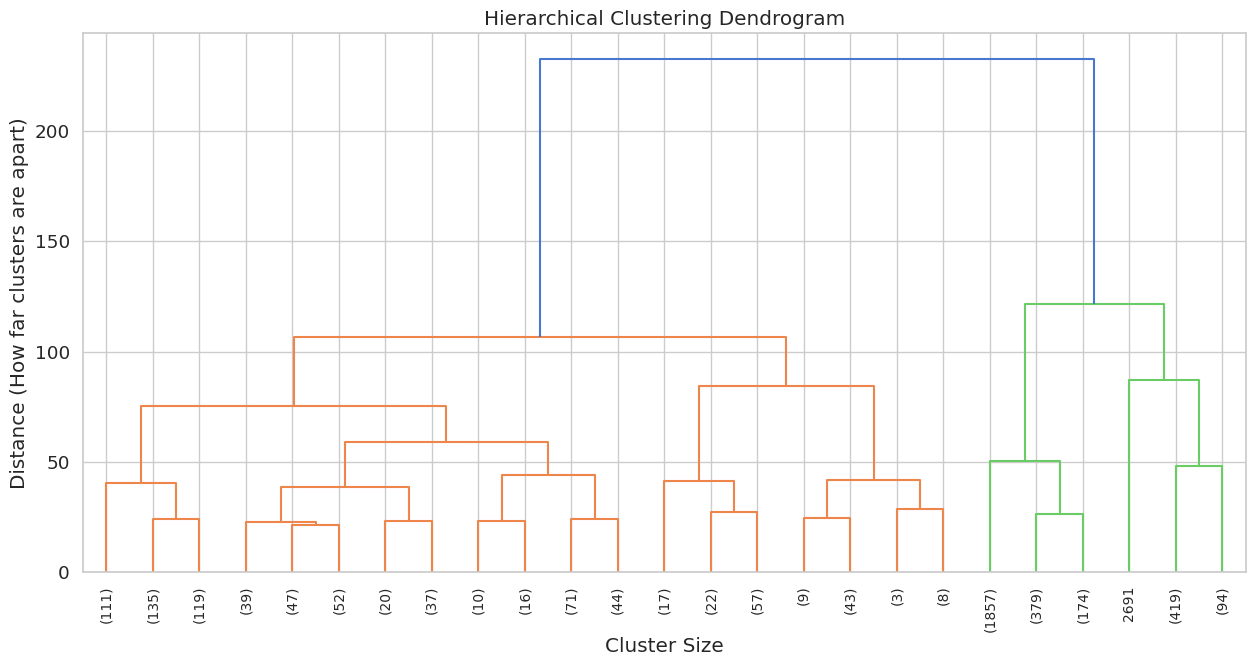

In [210]:
from scipy.cluster.hierarchy import dendrogram, linkage
# "linkage" builds the hierarchy (tree structure)
# "dendrogram" draws the tree visually

plt.figure(figsize=(15, 7))
# Make the figure wide so the dendrogram is readable.

linked = linkage(X_scaled, method='ward')
# "ward" method tries to combine clusters that increase variance the least.
# It builds the clustering tree step by step.
# X_scaled = your normalized data.

dendrogram(linked,
           truncate_mode='lastp',    # Only show last p merged clusters (cleaner)
           p=25,                      # Show the last 25 clusters
           leaf_rotation=90,          # Rotate labels so they don't overlap
           leaf_font_size=10)         # Make text readable

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance (How far clusters are apart)')
plt.show()
# This draws the actual dendrogram tree.

SILHOUETTE SCORE PLOT

K=2, Silhouette Score=0.6148
K=3, Silhouette Score=0.5525
K=4, Silhouette Score=0.5722
K=5, Silhouette Score=0.5724
K=6, Silhouette Score=0.5805
K=7, Silhouette Score=0.5685
K=8, Silhouette Score=0.5666
K=9, Silhouette Score=0.5650
K=10, Silhouette Score=0.5498


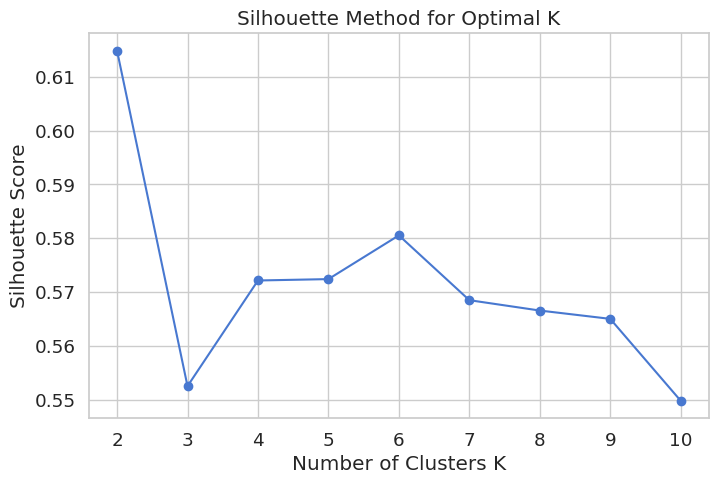

In [211]:
from sklearn.metrics import silhouette_score

# Define range of K to test
k_range = range(2, 11)  # For example, K from 2 to 10

silhouette_scores = []  # Empty list to store silhouette scores for each K

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    cluster_labels = kmeans.fit_predict(X_scaled)  # Fit and predict cluster labels
    score = silhouette_score(X_scaled, cluster_labels)  # Compute silhouette score
    silhouette_scores.append(score)  # Add score to the list
    print(f"K={k}, Silhouette Score={score:.4f}")  # Optional: print score

# Example: silhouette scores for different K (assuming k_range and silhouette_scores already computed)
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()


K-MEANS CLUSTERING

In [212]:
from sklearn.cluster import KMeans
# KMeans clusters players into groups based on similar stats.

inertia = []
# This will store how good each cluster attempt is.

k_range = range(2, 11)
# We will try 2 clusters, 3 clusters, 4 clusters... up to 10 clusters.

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # k = number of clusters, random_state = reproducible, n_init = better stability

    kmeans.fit(X_scaled)
    # Actually trains the model

    inertia.append(kmeans.inertia_)
    # Inertia = how compact the clusters are.
    # Lower is better.

In [213]:
print(inertia)

[46108.85374876156, 39038.49744359234, 32956.09658982382, 29169.514866317728, 25474.612228955757, 23293.745362124184, 21570.813501432192, 20396.85985128479, 19455.81872090978]


ELBOW METHOD

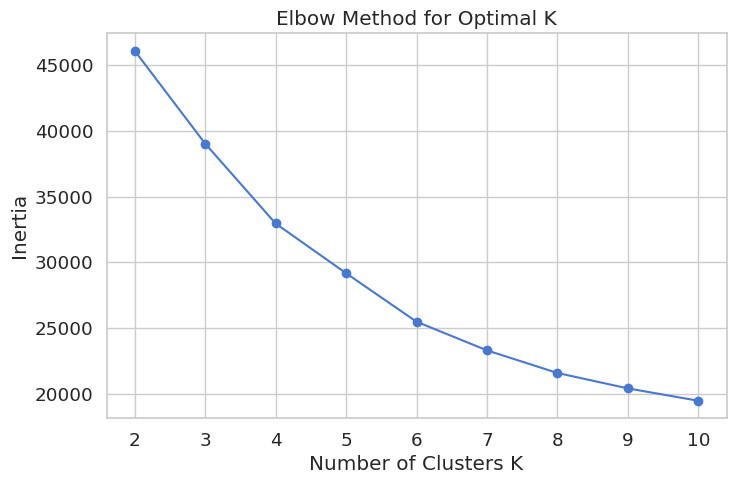

In [214]:
# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [215]:
optimal_k = 4  # Chosen optimal number of clusters from silhouette/elbow method

# Create KMeans model with 4 clusters, fix random_state for reproducibility, n_init=50 to reduce randomness
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50)

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Assign each row to its cluster (0 to 3)
data['cluster'] = kmeans.labels_

# Check the first few rows of the data with cluster labels
data.head()

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,...,fga,fgm,fta,ftm,tpa,tpm,leag_A,leag_F,leag_N,cluster
0,80.0,1001.0,248.0,9.0,57.0,69.0,247.0,39.0,3.0,72.0,...,217.0,92.0,72.0,53.0,48.0,11.0,0.0,0.0,1.0,0
1,384.0,6219.0,2152.0,0.0,0.0,683.0,596.0,0.0,0.0,0.0,...,2170.0,781.0,188.0,590.0,2.0,0.0,0.0,0.0,1.0,0
2,341.0,5719.0,645.5,9.0,1023.0,1592.0,319.0,321.0,5.0,229.0,...,968.0,435.0,186.0,62.0,0.0,0.0,0.0,0.0,1.0,0
3,3.0,19.0,12.0,2.0,2.0,4.0,1.0,1.0,0.0,1.0,...,625.5,5.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0
4,26.0,212.0,82.0,12.0,28.0,40.0,19.0,10.0,2.0,31.5,...,96.0,32.0,25.0,18.0,0.0,0.0,0.0,0.0,1.0,0


CLUSTER CENTROIDS

In [216]:
# Convert the cluster centers back to the original scale (undo standardization)
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)

# Add a 'cluster' column to identify which centroid belongs to which cluster
centroids['cluster'] = range(optimal_k)

# Print the centroids in original units to understand average values of each cluster
print('Centroids of clusters (original scale):')
print(centroids)


Centroids of clusters (original scale):
           gp       minutes           pts         oreb         dreb  \
0  106.938079   1467.814027    634.632687    54.353833   113.634372   
1  840.894737  26109.860324  13199.208502  1208.813765  3048.724696   
2  115.237113   2514.824742   1142.628866     2.519588   139.785567   
3  545.591445  13029.367257   5610.421091   487.560472  1146.148968   

           reb         asts         stl         blk     turnover  ...  \
0   278.718618   141.903117   32.753159   19.518113    57.289806  ...   
1  5061.591093  2948.785425  827.740891  528.048583  1567.281377  ...   
2   541.624742   216.690722   29.309278   18.004124   145.193814  ...   
3  2527.623894  1232.417404  330.610619  189.442478   575.887168  ...   

            fga          fgm          fta          ftm         tpa  \
0    597.061710   240.632056   189.642376   134.472199   29.479360   
1  10773.412955  5041.502024  3589.121457  2748.153846  900.825911   
2    970.494845   442.476289

PCA FOR VISUALIZATION

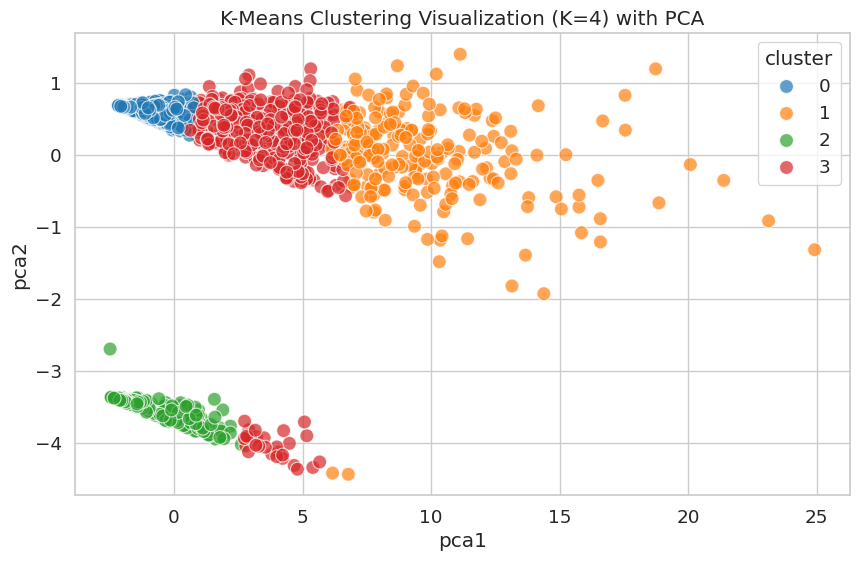

In [217]:
from sklearn.decomposition import PCA                  # Dimensionality reduction

# Create PCA object to reduce features to 2D for plotting
pca = PCA(n_components=2)

# Fit PCA to scaled data and transform it
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to original data
data['pca1'] = X_pca[:, 0]   # First principal component
data['pca2'] = X_pca[:, 1]   # Second principal component

# Plot clusters in 2D PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='pca1',
    y='pca2',
    hue='cluster',      # Color by K-Means cluster
    palette='tab10',
    s=100,              # Size of points
    alpha=0.7           # Transparency
)
plt.title(f'K-Means Clustering Visualization (K={optimal_k}) with PCA')
plt.show()

CLUSTER SUMMARY

In [218]:
# Compute mean of each feature for each cluster to understand cluster characteristics
cluster_summary = data.groupby('cluster')[features].mean()

print('\nCluster summary (mean stats per cluster):')
print(cluster_summary)


Cluster summary (mean stats per cluster):
                 gp       minutes           pts         oreb         dreb  \
cluster                                                                     
0        106.938079   1467.814027    634.632687    54.353833   113.634372   
1        840.894737  26109.860324  13199.208502  1208.813765  3048.724696   
2        115.237113   2514.824742   1142.628866     2.519588   139.785567   
3        545.591445  13029.367257   5610.421091   487.560472  1146.148968   

                 reb         asts         stl         blk     turnover  \
cluster                                                                  
0         278.718618   141.903117   32.753159   19.518113    57.289806   
1        5061.591093  2948.785425  827.740891  528.048583  1567.281377   
2         541.624742   216.690722   29.309278   18.004124   145.193814   
3        2527.623894  1232.417404  330.610619  189.442478   575.887168   

                  pf           fga          fgm  

DBSCAN CLUSTERING


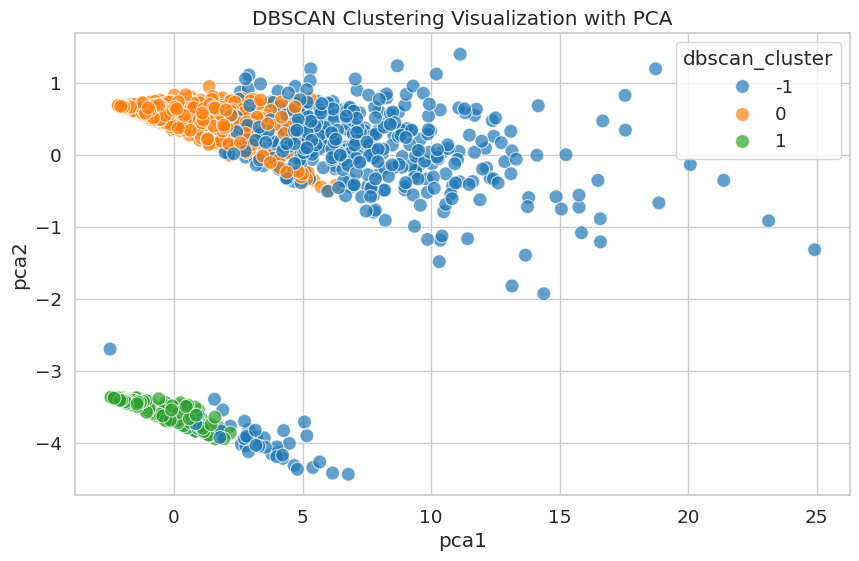


DBSCAN Cluster Summary:
                        gp       minutes          pts        oreb  \
dbscan_cluster                                                      
-1              710.263941  20256.625465  9807.098513  851.431227   
 0              163.520736   2880.469888  1208.645871  108.231879   
 1              109.530655   2329.216702  1050.885835    2.545455   

                       dreb          reb         asts         stl         blk  \
dbscan_cluster                                                                  
-1              2151.964684  4000.355019  2175.578067  595.044610  379.429368   
 0               235.064190   538.861522   266.580599   67.510638   37.148576   
 1               122.828753   511.319239   203.410148   27.983087   14.359408   

                   turnover           pf          fga          fgm  \
dbscan_cluster                                                       
-1              1115.253717  1831.680297  8037.354089  3785.156134   
 0           

In [219]:
from sklearn.cluster import KMeans, DBSCAN             # Clustering algorithms


# Initialize DBSCAN model with epsilon=2 and minimum samples=5
dbscan = DBSCAN(eps=2, min_samples=5)

# Fit DBSCAN and assign cluster labels (-1 = outliers)
data['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Plot DBSCAN clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='pca1',
    y='pca2',
    hue='dbscan_cluster',
    palette='tab10',
    s=100,
    alpha=0.7
)
plt.title('DBSCAN Clustering Visualization with PCA')
plt.show()

# Summary statistics of DBSCAN clusters
dbscan_summary = data.groupby('dbscan_cluster')[features].mean()
print('\nDBSCAN Cluster Summary:')
print(dbscan_summary)

K-MEANS vs DBSCAN COMPARISON

In [220]:
# Show crosstab of K-Means clusters vs DBSCAN clusters
print('\nK-Means vs DBSCAN Clusters')
print(pd.crosstab(data['cluster'], data['dbscan_cluster']))


K-Means vs DBSCAN Clusters
dbscan_cluster   -1     0    1
cluster                       
0                 0  2374    0
1               247     0    0
2                12     0  473
3               279   399    0


OUTLIERS FROM DBSCAN


Players flagged as outliers by DBSCAN:
       gp  minutes      pts    oreb    dreb     reb    asts     stl    blk  \
5   118.0  33922.0    645.5  1942.0  4761.0  6703.0  2283.0   885.0  627.0   
18  786.0  29459.0  11617.0     9.0  3952.0  5073.0   121.0  1625.0  234.0   
23  828.0  27275.0  14644.0  1627.0  3490.0   253.0  2050.0    13.0  262.0   
28  608.0  16843.0   6758.0     9.0  1229.0  1556.0  2223.0   792.0    5.0   
32  866.0  21871.0   9468.0  1199.0  2683.0  3882.0  1722.0   868.0  446.0   

    turnover  ...     fgm     fta     ftm     tpa    tpm  leag_A  leag_F  \
5     2549.0  ...  7378.0  6274.0  5066.0   740.0  227.0     0.0     0.0   
18    2606.0  ...  4172.0  2958.0  2300.0  2957.0  973.0     0.0     0.0   
23    1211.0  ...  6226.0  2878.0  2185.0    52.0    7.0     0.0     0.0   
28     920.0  ...  2540.0  1300.0  1073.0  1697.0  605.0     0.0     0.0   
32    1631.0  ...  3608.0   188.0  1562.0  1986.0  690.0     0.0     0.0   

    leag_N       pca1      pca2  


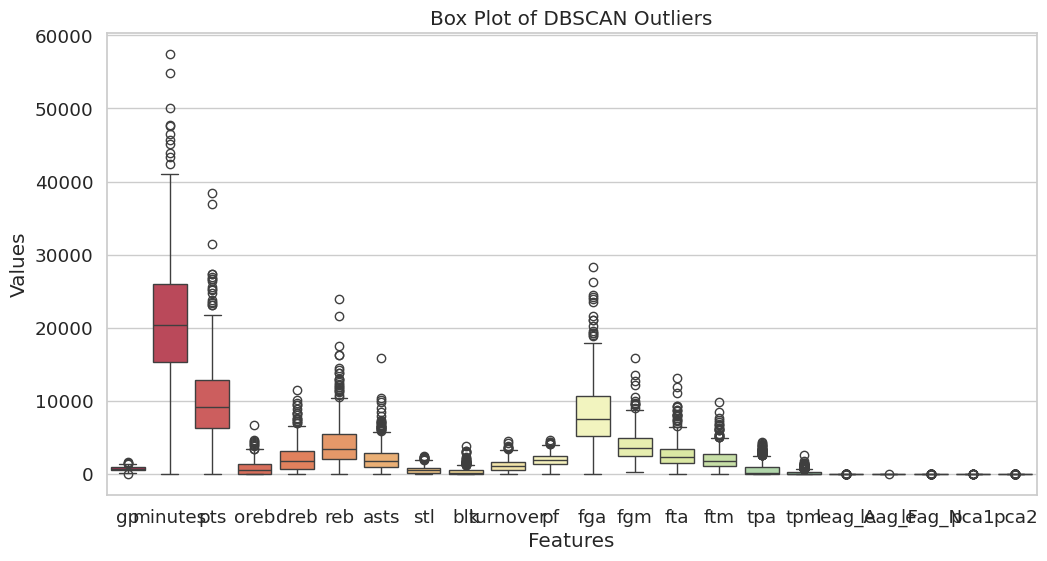

In [221]:
# Define features to analyze (exclude cluster labels)
features_to_analyze = [col for col in data.columns if col not in ['cluster', 'dbscan_cluster']]

# Filter out DBSCAN outliers (cluster = -1)
outliers = data[data['dbscan_cluster'] == -1]

print('\nPlayers flagged as outliers by DBSCAN:')
print(outliers[features_to_analyze].head())

# Box plot of outlier features
plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers[features_to_analyze], palette='Spectral')
plt.title('Box Plot of DBSCAN Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

HIERARCHICAL CLUSTERING (AGGLOMERATIVE CLUSTERING)

Number of items in each Agglomerative cluster:
Cluster
2    2342
3     593
0     515
1     334
Name: count, dtype: int64


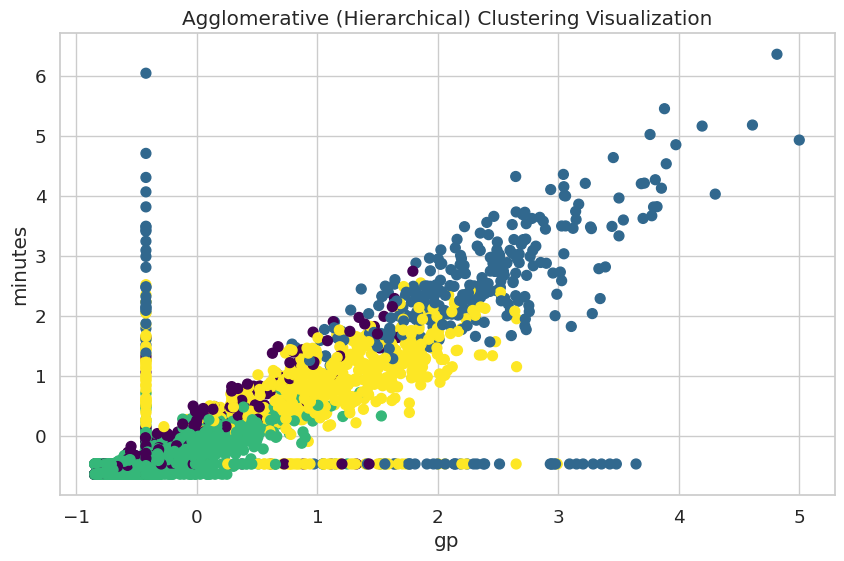

In [222]:
from sklearn.cluster import AgglomerativeClustering

# -----------------------------------------------------------
# We reuse the same scaled data 'df2' because clustering must
# be applied on normalized / scaled values.
# -----------------------------------------------------------

# Create a copy of data with only the features to scale
df2 = data[features_to_analyze].copy()

# Scale the data (important for clustering algorithms!)
scaler = StandardScaler()
df2[features_to_analyze] = scaler.fit_transform(df2)

# -----------------------------------------------------------
# Creating the model
# n_clusters = 4 because elbow + silhouette suggested 4 natural groups
# -----------------------------------------------------------
AggModel = AgglomerativeClustering(
    n_clusters=4,         # Number of clusters
    linkage='ward',       # Ward minimizes variance within clusters
    metric='euclidean'    # Distance measure (required for scikit-learn >= 1.3)
)

# -----------------------------------------------------------
# FITTING THE MODEL
# -----------------------------------------------------------
y_AgglomerativeC = AggModel.fit_predict(df2)

# -----------------------------------------------------------
# Creating a copy of df2 so we can store cluster labels
# without affecting original data
# -----------------------------------------------------------
df_AgglomerativeC = df2.copy()
df_AgglomerativeC['Cluster'] = y_AgglomerativeC

# -----------------------------------------------------------
# Checking how many items in each cluster
# -----------------------------------------------------------
print("Number of items in each Agglomerative cluster:")
print(df_AgglomerativeC['Cluster'].value_counts())

# -----------------------------------------------------------
# Visualizing the clusters
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=y_AgglomerativeC, s=50, cmap='viridis')
plt.title("Agglomerative (Hierarchical) Clustering Visualization")
plt.xlabel(features_to_analyze[0])
plt.ylabel(features_to_analyze[1])
plt.show()


K-MEANS CLUSTER SUMMARY

In [224]:
# Compute mean stats for K-Means clusters
kmeans_summary = data.groupby('cluster')[features_to_analyze].mean()
print('\nK-Means Cluster Summary:')
print(kmeans_summary)


K-Means Cluster Summary:
                 gp       minutes           pts         oreb         dreb  \
cluster                                                                     
0        106.938079   1467.814027    634.632687    54.353833   113.634372   
1        840.894737  26109.860324  13199.208502  1208.813765  3048.724696   
2        115.237113   2514.824742   1142.628866     2.519588   139.785567   
3        545.591445  13029.367257   5610.421091   487.560472  1146.148968   

                 reb         asts         stl         blk     turnover  ...  \
cluster                                                                 ...   
0         278.718618   141.903117   32.753159   19.518113    57.289806  ...   
1        5061.591093  2948.785425  827.740891  528.048583  1567.281377  ...   
2         541.624742   216.690722   29.309278   18.004124   145.193814  ...   
3        2527.623894  1232.417404  330.610619  189.442478   575.887168  ...   

                 fgm          fta   

DBSCAN CLUSTER SUMMARY

In [225]:
# Compute mean stats for DBSCAN clusters
dbscan_summary = data.groupby('dbscan_cluster')[features_to_analyze].mean()
print('\nDBSCAN Cluster Summary:')
print(dbscan_summary)


DBSCAN Cluster Summary:
                        gp       minutes          pts        oreb  \
dbscan_cluster                                                      
-1              710.263941  20256.625465  9807.098513  851.431227   
 0              163.520736   2880.469888  1208.645871  108.231879   
 1              109.530655   2329.216702  1050.885835    2.545455   

                       dreb          reb         asts         stl         blk  \
dbscan_cluster                                                                  
-1              2151.964684  4000.355019  2175.578067  595.044610  379.429368   
 0               235.064190   538.861522   266.580599   67.510638   37.148576   
 1               122.828753   511.319239   203.410148   27.983087   14.359408   

                   turnover  ...          fgm          fta          ftm  \
dbscan_cluster               ...                                          
-1              1115.253717  ...  3785.156134  2618.908922  2052.996283  

ANOMALY DETECTION

We use Isolation Forest because:
- It detects rare/unusual patterns in multivariate data
- Works well with continuous statistics (like NBA player stats)
- It does NOT assume normal distribution
- It is widely used in sports analytics for anomaly detection


In [223]:
# We use Isolation Forest because:
# - It detects rare/unusual patterns in multivariate data
# - Works well with continuous statistics (like NBA player stats)
# - It does NOT assume normal distribution
# - It is widely used in sports analytics for anomaly detection

from sklearn.ensemble import IsolationForest

# -----------------------------------------------------------
# Run anomaly detection on the SAME SCALED DATA (df2)
# because algorithms detect anomalies more accurately
# when features are normalized.
# -----------------------------------------------------------

# Create the Isolation Forest model
iso_forest = IsolationForest(
    contamination=0.05,        # 5% data assumed to be anomalies (can adjust)
    random_state=42
)

# Fit model and predict anomalies
# -----------------------------------------------------------
# Predict outputs:
#   1  → NORMAL data point
#  -1  → ANOMALY (unusual player performance)
# -----------------------------------------------------------

anomaly_labels = iso_forest.fit_predict(df2)

# Add anomalies to df2
df2["Anomaly"] = anomaly_labels

# -----------------------------------------------------------
# COUNT anomalies
# -----------------------------------------------------------
print("\n========== ANOMALY DETECTION REPORT ==========")
print("Normal players:", (anomaly_labels == 1).sum())
print("Anomalous players:", (anomaly_labels == -1).sum())




========== ANOMALY DETECTION REPORT ==========
Normal players: 3594
Anomalous players: 190


PLAYER TRAJECTORIES ANALYSIS

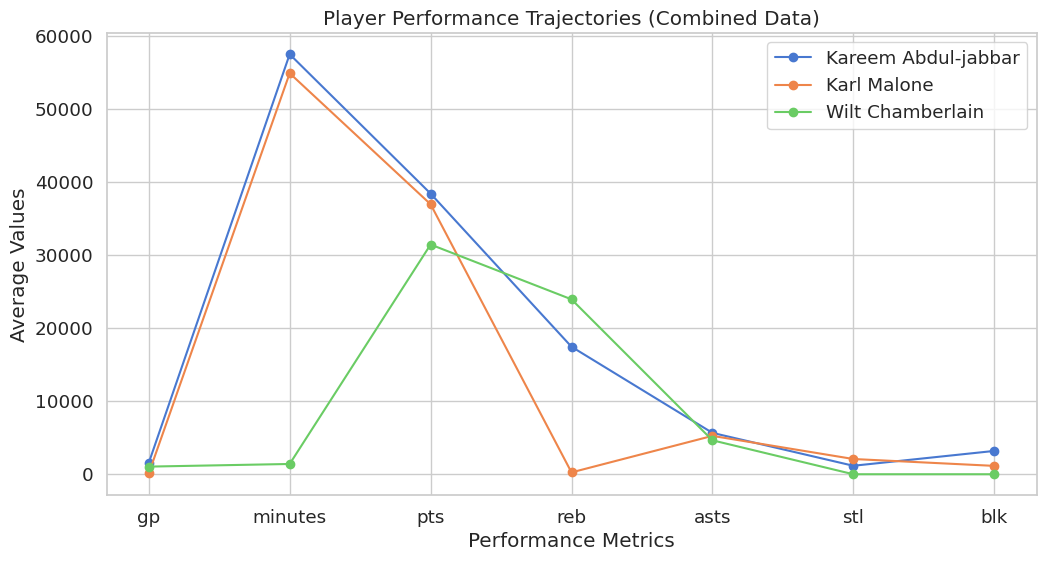

In [226]:
# Combine original data_copy (with names/IDs) and processed data
combined_df = pd.concat(
    [data_copy[['ilkid', 'firstname', 'lastname']], data[X.columns]],
    axis=1
)

# Select features for trajectory analysis
trajectory_features = ['gp', 'minutes', 'pts', 'reb', 'asts', 'stl', 'blk']

# Group by player using unique ID and names, compute average stats
player_trajectories = combined_df.groupby(
    ['ilkid', 'firstname', 'lastname'])[trajectory_features].mean().reset_index()

# Visualize trajectories for top 3 players by total points
top_players = player_trajectories.sort_values(by='pts', ascending=False).head(3)

plt.figure(figsize=(12, 6))
for _, row in top_players.iterrows():
    plt.plot(
        trajectory_features,
        row[trajectory_features],
        marker='o',
        label=f"{row['firstname']} {row['lastname']}"
    )

plt.xlabel('Performance Metrics')
plt.ylabel('Average Values')
plt.title('Player Performance Trajectories (Combined Data)')
plt.legend()
plt.show()

# Store player trajectories in a separate DataFrame
trajectories_df = player_trajectories.copy()
